### Import Packages

In [1]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("tab10")

import random as rnd
import numpy as np
rnd.seed(0)
np.random.seed(0)

import scipy.stats as stats
import bayes_logistic

from utils import *

(2, 2)
(50, 2)
(50, 2)


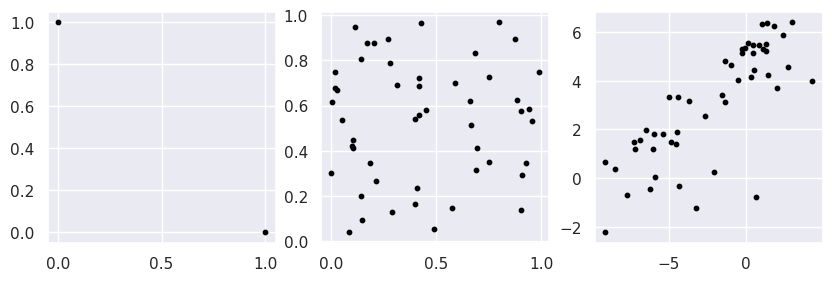

In [2]:
# load data_x
num_data = 50
num_data_half = num_data // 2

# two points
twopoints_x = np.array([[0, 1], [1, 0]])
print(twopoints_x.shape)

# uniform
uniform_x = stats.uniform.rvs(0, 1, size=(num_data,2), random_state=1)
print(uniform_x.shape)

# mix of gaussians
gmm_marginal_params = [
    [[1.0, 5.0], [(1.0, 0.0), (0.0, 1.0)]],
    [[-5.0, 1.0], [(3.0, 0.0), (0.0, 3.0)]]]

gmm_marginal_dists = [
    stats.multivariate_normal(mu, sigma, seed=12345) \
        for mu, sigma in gmm_marginal_params]

c0_x = gmm_marginal_dists[0].rvs(size=(num_data_half))
c1_x = gmm_marginal_dists[1].rvs(size=(num_data_half))
gmm_x = np.vstack((c0_x, c1_x))
print(gmm_x.shape)

# visualize
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(10,3))
axes = axes.flatten()

axes[0].scatter(twopoints_x[:,0], twopoints_x[:,1], color="black", s=10, marker="o")
axes[1].scatter(uniform_x[:,0], uniform_x[:,1], color="black", s=10, marker="o")
axes[2].scatter(gmm_x[:,0], gmm_x[:,1], color="black", s=10, marker="o")

# axes[0].set_xticks(np.arange(-10, 10, 5))
# axes[0].set_yticks(np.arange(-4, 10, 2))
# axes[0].legend(loc="lower right")
# plt.savefig("figures/feats_gauss")
plt.show()

### Sample weights, generate sample y from sample weights and visualize data

(50, 2)


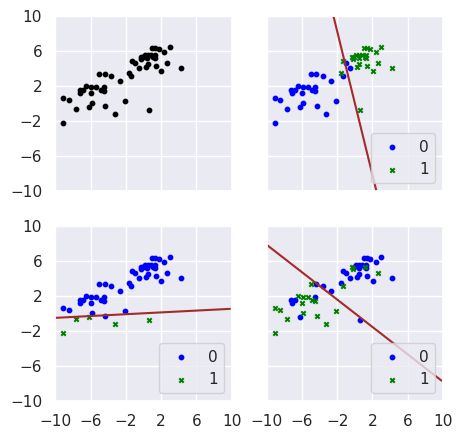

In [4]:
# generate data_x
data_x_marginal_params = [
    [[1.0, 5.0], [(1.0, 0.0), (0.0, 1.0)]],
    [[-5.0, 1.0], [(3.0, 0.0), (0.0, 3.0)]]]

data_x_marginal_dists = [
    stats.multivariate_normal(mu, sigma, seed=12345) \
        for mu, sigma in data_x_marginal_params]

c0_x = data_x_marginal_dists[0].rvs(size=(num_data_half))
c1_x = data_x_marginal_dists[1].rvs(size=(num_data_half))
data_x = np.vstack((c0_x, c1_x))
print(data_x.shape)

# sample weights, generate sample data_y, and plot sample data
coord0_min, coord0_max = -10, 10
coord1_min, coord1_max = -10, 10
mesh_size = 0.1
coord0_range = np.arange(coord0_min, coord0_max, mesh_size)
coord1_range = np.arange(coord1_min, coord1_max, mesh_size)
coord0, coord1 = np.meshgrid(coord0_range, coord1_range)
[n, n] = coord0.shape
coords = np.hstack((coord0.reshape((n*n, 1)), coord1.reshape((n*n, 1))))

weights_prior_params = [[0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]]]
# plot data_x according to pre-defined classes 
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5,5))
axes = axes.flatten()
# sns.kdeplot(data_x.squeeze(-1), shade=False, ax=axes[0])
axes[0].scatter(data_x[:,0], data_x[:,1], color="black", s=10, marker="o")
# axes[0].legend(loc="lower right")

# sample weights and generate sample y according to the weights, and plot 
weights_prior_dist = stats.multivariate_normal(
    weights_prior_params[0], weights_prior_params[1], seed=3)

np.random.seed(0) # reset random generator
for i in range(3):
    # sample weights
    sample_weights_prior = weights_prior_dist.rvs(1)
    
    # generate sample data_y
    sample_logit = 1.0 / (1 + np.exp(-np.dot(data_x, sample_weights_prior)))
    sample_y = stats.bernoulli.rvs(sample_logit)
     
    axes[i+1].scatter(data_x[sample_y==0,0], data_x[sample_y==0,1], 
                      color="blue", label=0, s=10, marker="o")
    axes[i+1].scatter(data_x[sample_y==1,0], data_x[sample_y==1,1], 
                      color="green", label=1, s=10, marker="x")
    
    pred = 1.0 / (1 + np.exp(np.dot(-coords, sample_weights_prior)))
    axes[i+1].contour(coord0, coord1, pred.reshape((n,n)), levels=1, colors="brown")
    axes[i+1].legend(loc="lower right")

    axes[i+1].set_xticks(np.arange(-10, 10.1, 4))
    axes[i+1].set_yticks(np.arange(-10, 10.1, 4))

# plt.yticks(np.arange(-1, 1, step=0.25))
# fig.tight_layout()
plt.savefig("figures/feats_classes")
plt.show()

#### Comments on the plots
1. Even though the data_x is set to be linearly separable, using random prior weights can lead to linearly nonseparable cases.